In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import glob
from PIL import Image
from IPython.display import display
import shutil
from torch.utils.data import Dataset
from torchvision import transforms

In [5]:
# Creating location for storing new filtered images of 512*512
path = '/content/drive/MyDrive/MRI'
hr_path = "/content/drive/MyDrive/MRI/LargeFiltered/HR"
os.makedirs(hr_path, exist_ok=True)
lr_path = "/content/drive/MyDrive/MRI/LargeFiltered/LR"
os.makedirs(lr_path, exist_ok=True)

In [4]:
# Path for the high resolution images.

path = "/content/drive/MyDrive/MRI/HR/HR_images/pituitary"

In [5]:
import os
from PIL import Image, ImageFilter

# Source and destination paths
source_path = "/content/drive/MyDrive/MRI/HR/HR_images/pituitary"
hr_path = "/content/drive/MyDrive/MRI/LargeFiltered/HR"
lr_path = "/content/drive/MyDrive/MRI/LargeFiltered/LR"

# Ensure output directories exist
os.makedirs(hr_path, exist_ok=True)
os.makedirs(lr_path, exist_ok=True)

# Blur intensity (higher = more blur)
blur_radius = 3.0  # You can increase this to 5.0 or higher for stronger blur

print("Starting image degradation using Gaussian Blur...")

count = 0
for filename in os.listdir(source_path):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
            img_path = os.path.join(source_path, filename)
            img = Image.open(img_path)

            if img.size == (512, 512):
                # Save original image to HR path
                img.save(os.path.join(hr_path, filename))

                # Apply Gaussian Blur
                blurred_img = img.filter(ImageFilter.GaussianBlur(radius=blur_radius))

                # Save blurred version as LR
                blurred_img.save(os.path.join(lr_path, filename))

                print(f"[✓] Blurred and saved: {filename}")
                count += 1
            else:
                print(f"[x] Skipped (Not 512x512): {filename}")

        except Exception as e:
            print(f"[!] Error processing {filename}: {e}")

print(f"\n✅ Completed! {count} images processed with blurred versions saved.")


Starting image degradation using Gaussian Blur...
[✓] Blurred and saved: Tr-pi_0462.jpg
[✓] Blurred and saved: Tr-pi_0444.jpg
[✓] Blurred and saved: Tr-pi_0466.jpg
[✓] Blurred and saved: Tr-pi_0489.jpg
[✓] Blurred and saved: Tr-pi_0449.jpg
[✓] Blurred and saved: Tr-pi_0471.jpg
[✓] Blurred and saved: Tr-pi_0460.jpg
[✓] Blurred and saved: Tr-pi_0473.jpg
[✓] Blurred and saved: Tr-pi_0493.jpg
[✓] Blurred and saved: Tr-pi_0478.jpg
[✓] Blurred and saved: Tr-pi_0458.jpg
[✓] Blurred and saved: Tr-pi_0487.jpg
[✓] Blurred and saved: Tr-pi_0451.jpg
[✓] Blurred and saved: Tr-pi_0467.jpg
[✓] Blurred and saved: Tr-pi_0492.jpg
[✓] Blurred and saved: Tr-pi_0441.jpg
[✓] Blurred and saved: Tr-pi_0459.jpg
[✓] Blurred and saved: Tr-pi_0475.jpg
[✓] Blurred and saved: Tr-pi_0445.jpg
[✓] Blurred and saved: Tr-pi_0494.jpg
[✓] Blurred and saved: Tr-pi_0480.jpg
[✓] Blurred and saved: Tr-pi_0469.jpg
[✓] Blurred and saved: Tr-pi_0446.jpg
[✓] Blurred and saved: Tr-pi_0455.jpg
[✓] Blurred and saved: Tr-pi_0447.jpg


In [6]:
# High Quality and Blur images

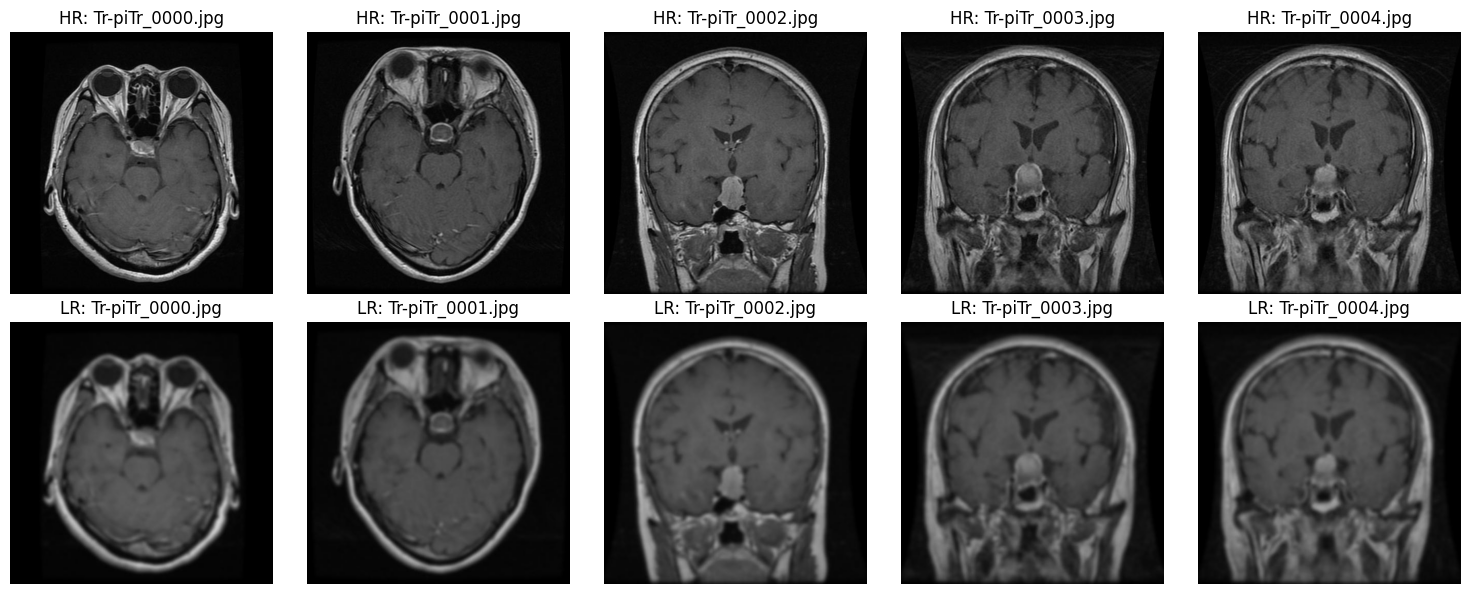

In [7]:
from PIL import Image
import matplotlib.pyplot as plt
import os

# Paths
hr_path = '/content/drive/MyDrive/MRI/LargeFiltered/HR'
lr_path = '/content/drive/MyDrive/MRI/LargeFiltered/LR'

# Get sorted list of filenames (just 5 common ones)
filenames = sorted(os.listdir(hr_path))[:5]  # Adjust index to pick any batch

plt.figure(figsize=(15, 6))

for idx, fname in enumerate(filenames):
    hr_img = Image.open(os.path.join(hr_path, fname))
    lr_img = Image.open(os.path.join(lr_path, fname))

    # HR image (top row)
    plt.subplot(2, 5, idx + 1)
    plt.imshow(hr_img)
    plt.title(f'HR: {fname}')
    plt.axis('off')

    # LR image (bottom row)
    plt.subplot(2, 5, idx + 6)
    plt.imshow(lr_img)
    plt.title(f'LR: {fname}')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
import tensorflow as tf


def load_data(lr_path, hr_path, num_images=750):
    lr_images = []
    hr_images = []

    # Get list of image filenames
    lr_filenames = [f for f in os.listdir(lr_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    hr_filenames = [f for f in os.listdir(hr_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Ensure we are taking the first 'num_images' images
    lr_filenames = lr_filenames[:num_images]
    hr_filenames = hr_filenames[:num_images]

    # Load images from both directories
    for lr_file, hr_file in zip(lr_filenames, hr_filenames):
        # Load low-resolution image (grayscale)
        lr_image = tf.io.read_file(os.path.join(lr_path, lr_file))
        lr_image = tf.image.decode_jpeg(lr_image, channels=1)
        lr_image = tf.image.resize(lr_image, (512, 512))  # Ensure it's 512x512
        lr_images.append(lr_image)

        # Load high-resolution image (grayscale)
        hr_image = tf.io.read_file(os.path.join(hr_path, hr_file))
        hr_image = tf.image.decode_jpeg(hr_image, channels=1)
        hr_image = tf.image.resize(hr_image, (512, 512))  # Ensure it's 512x512
        hr_images.append(hr_image)

    return tf.stack(lr_images), tf.stack(hr_images)

# Load the dataset with 750 images
lr_images, hr_images = load_data(lr_path, hr_path, num_images=750)

# Normalize the images to [0, 1]
lr_images = lr_images / 255.0
hr_images = hr_images / 255.0


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import os
import time

# Set paths for LR and HR images
lr_path = "/content/drive/MyDrive/MRI/LargeFiltered/LR"
hr_path = "/content/drive/MyDrive/MRI/LargeFiltered/HR"
save_dir = "/content/drive/MyDrive/MRI/Large_model/"
os.makedirs(save_dir, exist_ok=True)

import tensorflow as tf


def load_data(lr_path, hr_path, num_images=500):
    lr_images = []
    hr_images = []

    # Get list of image filenames
    lr_filenames = [f for f in os.listdir(lr_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    hr_filenames = [f for f in os.listdir(hr_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    # Ensure we are taking the first 'num_images' images
    lr_filenames = lr_filenames[:num_images]
    hr_filenames = hr_filenames[:num_images]

    # Load images from both directories
    for lr_file, hr_file in zip(lr_filenames, hr_filenames):
        # Load low-resolution image (grayscale)
        lr_image = tf.io.read_file(os.path.join(lr_path, lr_file))
        lr_image = tf.image.decode_jpeg(lr_image, channels=1)
        lr_image = tf.image.resize(lr_image, (512, 512))  # Ensure it's 512x512
        lr_images.append(lr_image)

        # Load high-resolution image (grayscale)
        hr_image = tf.io.read_file(os.path.join(hr_path, hr_file))
        hr_image = tf.image.decode_jpeg(hr_image, channels=1)
        hr_image = tf.image.resize(hr_image, (512, 512))  # Ensure it's 512x512
        hr_images.append(hr_image)

    return tf.stack(lr_images), tf.stack(hr_images)

# Load the dataset with 750 images
lr_images, hr_images = load_data(lr_path, hr_path, num_images=750)

# Normalize the images to [0, 1]
lr_images = lr_images / 255.0
hr_images = hr_images / 255.0


# Define a residual block
def residual_block(x, filters, kernel_size=3, stride=1):
    res = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    res = layers.BatchNormalization()(res)
    res = layers.PReLU(shared_axes=[1, 2])(res)
    res = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(res)
    res = layers.BatchNormalization()(res)
    return layers.Add()([x, res])

# Create the cascaded generator model
def build_cascaded_generator(input_shape=(512, 512, 1)):
    inputs = tf.keras.Input(shape=input_shape)

    # First generator stage
    x = layers.Conv2D(64, kernel_size=9, strides=1, padding='same')(inputs)
    x = layers.PReLU(shared_axes=[1, 2])(x)
    residual = x

    # Residual blocks for first stage
    for _ in range(5):
        x = residual_block(x, 64)

    # Skip connection after residual blocks
    x = layers.Conv2D(64, kernel_size=3, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Add()([x, residual])

    # Upsample 3x (16 → 128): 2x2x2
    for _ in range(3):
        x = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(x)
        x = layers.PReLU(shared_axes=[1, 2])(x)

    # Intermediate output (128x128)
    intermediate_output = layers.Conv2D(1, kernel_size=9, strides=1, padding='same',
                                       activation='sigmoid', name='intermediate_output')(x)

    # Second generator (refinement) stage
    y = layers.Conv2D(64, kernel_size=5, strides=1, padding='same')(intermediate_output)
    y = layers.PReLU(shared_axes=[1, 2])(y)

    # Attention mechanism
    attention = layers.Conv2D(64, kernel_size=1, padding='same')(intermediate_output)
    attention = layers.Activation('sigmoid')(attention)
    y = layers.Multiply()([y, attention])

    # Residual blocks for refinement
    residual2 = y
    for _ in range(3):
        y = residual_block(y, 64)

    # Skip connection after residual blocks
    y = layers.Conv2D(64, kernel_size=3, strides=1, padding='same')(y)
    y = layers.BatchNormalization()(y)
    y = layers.Add()([y, residual2])

    # Upsample 2x further (128 → 512): 2x2
    for _ in range(2):
        y = layers.Conv2DTranspose(64, kernel_size=4, strides=2, padding='same')(y)
        y = layers.PReLU(shared_axes=[1, 2])(y)

    # Final output (512x512)
    final_output = layers.Conv2D(1, kernel_size=9, strides=1, padding='same',
                                 activation='sigmoid', name='final_output')(y)

    return tf.keras.Model(inputs, [intermediate_output, final_output], name='cascaded_generator')

# Build the generator and discriminator
generator = build_cascaded_generator()

# Define the discriminator
def build_discriminator(input_shape=(512, 512, 1)):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Conv2D(64, kernel_size=3, strides=2, padding='same')(inputs)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(128, kernel_size=3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(256, kernel_size=3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(512, kernel_size=3, strides=2, padding='same')(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(1)(x)
    return tf.keras.Model(inputs, x, name='discriminator')

discriminator = build_discriminator()

# Define losses and optimizers
mse_loss = tf.keras.losses.MeanSquaredError()
bce_loss = tf.keras.losses.BinaryCrossentropy(from_logits=False)

g_optimizer = tf.keras.optimizers.Adam(5e-5)
d_optimizer = tf.keras.optimizers.Adam(1e-5)

# Define pixel accuracy function
def pixel_accuracy(y_true, y_pred):
    return 1.0 - tf.reduce_mean(tf.abs(y_true - y_pred))

# Training loop
epochs = 20
batch_size = 8
steps_per_epoch = len(lr_images) // batch_size


@tf.function
def train_step(lr, hr):
    with tf.GradientTape() as dt:
        # Generate SR images
        intermediate_sr, final_sr = generator(lr)

        # Ensure the generated image has the correct shape
        final_sr = tf.image.resize(final_sr, (512, 512))  # Reshape if necessary to (512, 512, 1)

        # Get discriminator outputs
        real_output = discriminator(hr)
        fake_output = discriminator(final_sr)

        # Discriminator loss with label smoothing
        d_loss_real = bce_loss(tf.ones_like(real_output) * 0.9, real_output)
        d_loss_fake = bce_loss(tf.zeros_like(fake_output) * 0.1, fake_output)
        d_loss = d_loss_real + d_loss_fake

    # Apply discriminator gradients
    d_grads = dt.gradient(d_loss, discriminator.trainable_weights)
    d_optimizer.apply_gradients(zip(d_grads, discriminator.trainable_weights))

    with tf.GradientTape() as gt:
        # Generate SR images again
        intermediate_sr, final_sr = generator(lr)

        # Ensure the generated image has the correct shape
        final_sr = tf.image.resize(final_sr, (512, 512))  # Reshape if necessary to (512, 512, 1)

        # Get discriminator output for fake images
        fake_output = discriminator(final_sr)

        # Calculate content and adversarial losses
        content_loss = mse_loss(hr, final_sr)
        adversarial_loss = bce_loss(tf.ones_like(fake_output), fake_output)

        # Total generator loss
        g_loss = content_loss + adversarial_loss

    # Apply generator gradients
    g_grads = gt.gradient(g_loss, generator.trainable_weights)
    g_optimizer.apply_gradients(zip(g_grads, generator.trainable_weights))

    # Calculate accuracy
    acc = pixel_accuracy(hr, final_sr)

    return g_loss, d_loss, acc


# Train the model
start_time = time.time()
for epoch in range(epochs):
    total_g_loss = 0
    total_d_loss = 0
    total_acc = 0
    steps = 0

    for step in range(steps_per_epoch):
        # Get a batch of data
        batch_lr = lr_images[step * batch_size:(step + 1) * batch_size]
        batch_hr = hr_images[step * batch_size:(step + 1) * batch_size]

        # Convert to tensors
        batch_lr = tf.convert_to_tensor(batch_lr, dtype=tf.float32)
        batch_hr = tf.convert_to_tensor(batch_hr, dtype=tf.float32)

        # Perform training step
        g_loss, d_loss, acc = train_step(batch_lr, batch_hr)

        total_g_loss += g_loss
        total_d_loss += d_loss
        total_acc += acc
        steps += 1

        # Print progress every 10 steps
        if step % 10 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Step {step} | "
                  f"G Loss: {g_loss:.4f}, D Loss: {d_loss:.4f}, Acc: {acc:.4f}")

    # Calculate and print averages for the epoch
    avg_g_loss = total_g_loss / steps
    avg_d_loss = total_d_loss / steps
    avg_acc = total_acc / steps
    print(f"Epoch {epoch+1}/{epochs} | "
          f"Generator Loss: {avg_g_loss:.4f} | "
          f"Discriminator Loss: {avg_d_loss:.4f} | "
          f"Accuracy: {avg_acc:.4f}")

    # Save models every 10 epochs
    if (epoch + 1) % 10 == 0:
        generator.save(save_dir + f"generator_epoch_{epoch+1}.h5")
        discriminator.save(save_dir + f"discriminator_epoch_{epoch+1}.h5")

# Save the final models
generator.save(save_dir + "generator_final.h5")
discriminator.save(save_dir + "discriminator_final.h5")
print("✅ Models saved successfully.")

end_time = time.time()
print(f"🕒 Total training time: {(end_time - start_time)/60:.2f} minutes")


In [ ]:
from PIL import Image
import os

all_good = True

for filename in os.listdir(filtered_path):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        img_path = os.path.join(filtered_path, filename)
        try:
            img = Image.open(img_path)
            if img.size != (512, 512):
                print(f"[❌] Image {filename} is NOT 512x512. It is {img.size}")
                all_good = False
        except Exception as e:
            print(f"[⚠️] Couldn't open {filename}: {e}")

if all_good:
    print("\n✅ All images are confirmed to be 512x512!")
else:
    print("\n❗Some images are not 512x512. Check above.")


[⚠️] Couldn't open Tr-pi_0603.jpg: cannot identify image file '/content/drive/MyDrive/MRI/HR/HR_images/filtered/Tr-pi_0603.jpg'

✅ All images are confirmed to be 512x512!


In [ ]:
for filename in os.listdir(filtered_path):
    if filename.endswith((".jpg", ".jpeg", ".png")):
        hr_image_path = os.path.join(filtered_path, filename)
        lr_image_path = os.path.join(lr_path, filename)

        try:
            img = Image.open(hr_image_path).convert("L")  # Grayscale
            img_lr = img.resize((16, 16), Image.BICUBIC)  # Downsample
            img_lr.save(lr_image_path)
        except Exception as e:
            print(f"[⚠️] Error processing {filename}: {e}")


In [ ]:
low_images=[]
for imgs in os.listdir(lr_path):
  if imgs.endswith((".png",".jpg",".jpeg")):
    img = Image.open(lr_path + '/' + imgs).convert("L")
    low_images.append(img)

In [ ]:
high_images=[]
for imgs in os.listdir(filtered_path):
  if imgs.endswith((".png",".jpg",".jpeg")):
    img = Image.open(filtered_path + '/' + imgs).convert("L")
    high_images.append(img)

UnidentifiedImageError: cannot identify image file '/content/drive/MyDrive/MRI/HR/HR_images/filtered/Tr-pi_0603.jpg'

In [ ]:
if (len(low_images) == len(high_images)) :
  print("True")
else:
  print("False")

False


In [ ]:
import numpy as np
hr_images_np = [np.expand_dims(np.array(img).astype(np.float32) / 255.0, axis=-1) for img in high_images]
lr_images_np = [np.expand_dims(np.array(img).astype(np.float32) / 255.0, axis=-1) for img in low_images]


In [ ]:
import tensorflow as tf

hr_images_np = np.array(hr_images_np)
lr_images_np = np.array(lr_images_np)

dataset = tf.data.Dataset.from_tensor_slices((lr_images_np, hr_images_np))

BATCH_SIZE = 8
train_dataset = dataset.shuffle(buffer_size=1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


In [ ]:
# from tensorflow.keras import layers, models

# def build_generator():
#     inputs = layers.Input(shape=(16, 16, 1))  # Your low-res input

#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(inputs)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 32x32
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 64x64
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 128x128
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 256x256
#     x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
#     x = layers.UpSampling2D(size=(2, 2))(x)  # 512x512

#     outputs = layers.Conv2D(1, (3, 3), padding='same', activation='sigmoid')(x)

#     model = models.Model(inputs, outputs)
#     return model

# generator = build_generator()
# generator.summary()


In [ ]:
def build_discriminator():
    inputs = layers.Input(shape=(512, 512, 1))  # High-resolution grayscale input

    x = layers.Conv2D(64, (3, 3), strides=2, padding="same")(inputs)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(128, (3, 3), strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(256, (3, 3), strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Conv2D(512, (3, 3), strides=2, padding="same")(x)
    x = layers.LeakyReLU(0.2)(x)

    x = layers.Flatten()(x)
    x = layers.Dense(1024)(x)
    x = layers.LeakyReLU(0.2)(x)
    x = layers.Dense(1, activation='sigmoid')(x)

    return models.Model(inputs, x)

discriminator = build_discriminator()
discriminator.summary()


NameError: name 'layers' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

discriminator.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    metrics=['accuracy']
)

In [ ]:
# Freeze the discriminator weights while training the GAN
discriminator.trainable = False

# Input from LR image
lr_input = layers.Input(shape=(16, 16, 1))

# Pass through generator
generated_hr = generator(lr_input)

# Pass generated image through discriminator
gan_output = discriminator(generated_hr)

# Define the GAN model
gan_model = models.Model(lr_input, gan_output)

# Compile GAN
gan_model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4)
)


In [ ]:
for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    for step, (lr_imgs, hr_imgs) in enumerate(train_dataset):
        batch_size = lr_imgs.shape[0]  # Dynamically get batch size

        # ---------------------
        #  Train Discriminator
        # ---------------------
        fake_hr = generator.predict(lr_imgs, verbose=0)

        real_labels = tf.ones((batch_size, 1))
        fake_labels = tf.zeros((batch_size, 1))

        d_loss_real = discriminator.train_on_batch(hr_imgs, real_labels)
        d_loss_fake = discriminator.train_on_batch(fake_hr, fake_labels)
        d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  Train Generator via GAN
        # ---------------------
        g_loss = gan_model.train_on_batch(lr_imgs, real_labels)

        if step % 10 == 0:
            print(f"[Step {step}] D_loss: {d_loss[0]:.4f}, D_acc: {d_loss[1]*100:.2f}%, G_loss: {g_loss:.4f}")



Epoch 1/50
[Step 0] D_loss: 0.6935, D_acc: 34.78%, G_loss: 0.6950
[Step 10] D_loss: 0.6936, D_acc: 33.16%, G_loss: 0.6949
[Step 20] D_loss: 0.6936, D_acc: 31.83%, G_loss: 0.6948
[Step 30] D_loss: 0.6937, D_acc: 30.48%, G_loss: 0.6947
[Step 40] D_loss: 0.6937, D_acc: 29.45%, G_loss: 0.6946
[Step 50] D_loss: 0.6938, D_acc: 28.40%, G_loss: 0.6945
[Step 60] D_loss: 0.6938, D_acc: 27.44%, G_loss: 0.6944
[Step 70] D_loss: 0.6938, D_acc: 26.56%, G_loss: 0.6943
[Step 80] D_loss: 0.6939, D_acc: 25.73%, G_loss: 0.6942
[Step 90] D_loss: 0.6939, D_acc: 25.07%, G_loss: 0.6942
[Step 100] D_loss: 0.6940, D_acc: 24.32%, G_loss: 0.6941
[Step 110] D_loss: 0.6940, D_acc: 23.78%, G_loss: 0.6940
[Step 120] D_loss: 0.6941, D_acc: 23.15%, G_loss: 0.6939
[Step 130] D_loss: 0.6941, D_acc: 22.71%, G_loss: 0.6938
[Step 140] D_loss: 0.6941, D_acc: 22.21%, G_loss: 0.6938
[Step 150] D_loss: 0.6942, D_acc: 21.68%, G_loss: 0.6937
[Step 160] D_loss: 0.6942, D_acc: 21.28%, G_loss: 0.6936
[Step 170] D_loss: 0.6942, D_a

KeyboardInterrupt: 